In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
observation = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
#print (observation.dtypes)
#print (observation.isnull().sum())
#print (observation.park_name.unique())
#print (observation.scientific_name.unique)
print (observation.duplicated().sum() , ', number of duplicated values in observation data')
observation_2 = observation.drop_duplicates()
print (observation_2.shape , ' dimensions of the dataframe')
print (observation_2.scientific_name.nunique() , ' unique values of the dataframe')

15 , number of duplicated values in observation data
(23281, 3)  dimensions of the dataframe
5541  unique values of the dataframe


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
                                     observations
park_name                                        
Yellowstone National Park                 1442314
Yosemite National Park                     862836
Bryce National Park                        575901
Great Smoky Mountains National Park        431378


Text(0.5, 1.0, 'Number of Observations in each park')

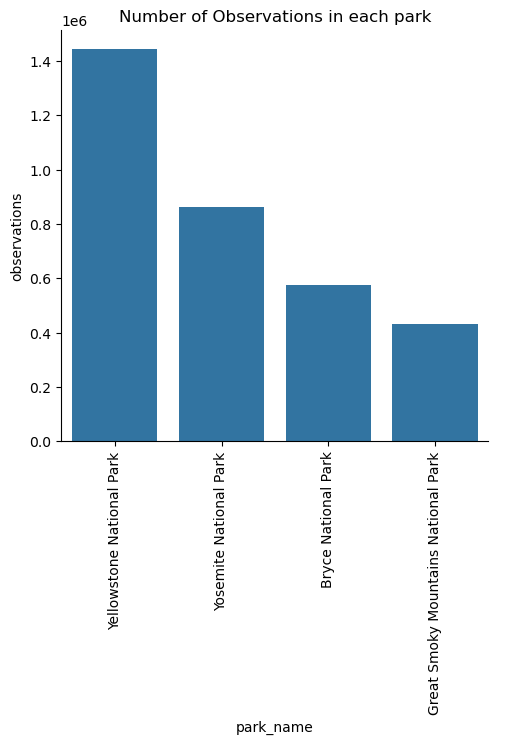

In [5]:
print (observation_2.head())
obervations_parks = observation_2.groupby('park_name').sum(numeric_only=True).sort_values(by='observations', ascending=False)
print (obervations_parks)
sns.catplot(data=obervations_parks , kind = 'bar' , x = 'park_name' , y ='observations')
plt.xticks(rotation=90)
plt.title('Number of Observations in each park')

In [6]:
import plotly.express as px

smoky_mountains = observation_2.loc[observation_2.park_name == 'Great Smoky Mountains National Park']
smoky_mountains_combined = smoky_mountains.groupby('scientific_name', as_index=False)['observations'].sum()
yosemite = observation_2.loc[observation_2.park_name == 'Yosemite National Park']
yosemite_combined = yosemite.groupby('scientific_name', as_index=False)['observations'].sum()
yellowstone = observation_2.loc[observation_2.park_name == 'Yellowstone National Park']
yellowstone_combined = yellowstone.groupby('scientific_name', as_index=False)['observations'].sum()
bryce = observation_2.loc[observation_2.park_name == 'Bryce National Park']
bryce_combined = bryce.groupby('scientific_name', as_index=False)['observations'].sum()

smoky_mountains_endangered = smoky_mountains_combined.sort_values(by ='observations' , ascending=True).head(20)
fig = px.bar(smoky_mountains_endangered, x = 'scientific_name' , y = 'observations',title="Least observed species in Great Smokey Mountain National Park")
fig.show()

yosemite_endangered = yosemite_combined.sort_values(by ='observations' , ascending=True).head(20)
fig = px.bar(yosemite_endangered, x = 'scientific_name' , y = 'observations', title="Least observed species in yosemite National Park")
fig.show()


yellowstone_endangered = yellowstone_combined.sort_values(by ='observations' , ascending=True).head(20)
fig = px.bar(yellowstone_endangered, x = 'scientific_name' , y = 'observations', title = 'Least observed species in yellowstone National Park')
fig.show()


bryce_endangered = bryce_combined.sort_values(by ='observations' , ascending=True).head(20)
fig = px.bar(bryce_endangered, x = 'scientific_name' , y = 'observations', title = 'Least observed species in bryce National Park')
fig.show()


In [7]:
import plotly.express as px


smoky_mountains_endangered = smoky_mountains_combined.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(smoky_mountains_endangered, x = 'scientific_name' , y = 'observations',title="Most observed species in Great Smokey Mountain National Park")
fig.show()

yosemite_endangered = yosemite_combined.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(yosemite_endangered, x = 'scientific_name' , y = 'observations', title="Most observed species in yosemite National Park")
fig.show()


yellowstone_endangered = yellowstone_combined.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(yellowstone_endangered, x = 'scientific_name' , y = 'observations', title = 'Most observed species in yellowstone National Park')
fig.show()


bryce_endangered = bryce_combined.sort_values(by ='observations' , ascending=False).head(20)
fig = px.bar(bryce_endangered, x = 'scientific_name' , y = 'observations', title = 'Most observed species in bryce National Park')
fig.show()


In [8]:
# species.set_index('category')
print (species.head())
species = species.drop_duplicates('scientific_name')
species['category_copy'] = species['category']
category_numbered = species.groupby('category_copy').size().reset_index(name='count')
category_numbered_sorted = category_numbered.sort_values(by='count', ascending=False)


fig = px.bar(category_numbered_sorted, x = 'category_copy' , y = 'count',title="number of species based on category")
fig.show()

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [9]:
conserved = species[species.conservation_status.isnull() == False]
conserved_numbered = conserved.groupby('conservation_status').size().reset_index(name='count')
conserved_numbered_sorted = conserved_numbered.sort_values(by='count', ascending=False)
fig = px.bar(conserved_numbered_sorted, x = 'conservation_status' , y = 'count', title="number of species based on conservation status")
fig.show()

In [10]:
#species.head()
concerned = species[species['conservation_status'] == 'Species of Concern']
concerned_grouped = concerned.groupby('category').size().reset_index(name='count')
concerned_grouped_sorted = concerned_grouped.sort_values(by='count', ascending=False)

fig = px.bar(concerned_grouped_sorted, x = 'category' , y = 'count', title="categories of species of concern")
fig.show()

In [11]:
fig = px.pie(concerned_grouped_sorted, values='count', names='category', title='species of concern')
fig.show()